<a href="https://colab.research.google.com/github/LOOKatKimhyein/CRM-analysis/blob/main/(5)_%EC%9D%B4%ED%83%88%EA%B3%A0%EA%B0%9D%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이탈 예측모형

In [4]:
# 분석에 사용할 패키지 로딩
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn as sk

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import xgboost as xgb

In [5]:
# pandas 옵션 모든 컬럼 표시
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_seq_items', None)
# pd.set_option('display.max_rows', None)

# 그래프 스타일 선택 
plt.style.use('ggplot')  

# 그래프 바로 보기 
%matplotlib inline

In [6]:
# 구글 드라이브에 있는  데이터셋 연결을 위한 구글드라이브 세팅
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##  2.데이터 불러오기

In [7]:
# 파일의 위치는 내 구글드라이브 연결후 실습 파일을 선택하고 "..." 클릭하여 "경로복사"를 하여 붙여 넣으시면 됩니다. 
data = pd.read_csv('/content/drive/MyDrive/2.offline_study/러닝스푼즈-CRM Analysis/CRM-Analysis/DAY5/Cell2Cell_NA.csv')

data.head() # 처음 5개 데이터 확인

,REVENUE,MOU,RECCHRGE,DIRECTAS,OVERAGE,ROAM,CHANGEM,CHANGER,DROPVCE,BLCKVCE,...,REFER,INCMISS,INCOME,MCYCLE,CREDITAD,SETPRCM,SETPRC,RETCALL,CALIBRAT,CHURNDEP
0,57.49,482.75,37.43,0.25,22.75,0.0,532.25,50.99,8.33,1.00,...,0,0,5,0,1,0,149.99,0,0,NaN
1,82.28,1312.25,75.00,1.24,0.00,0.0,156.75,8.14,52.00,7.67,...,0,0,6,0,0,0,9.99,0,0,NaN
2,31.66,25.50,29.99,0.25,0.00,0.0,59.50,4.03,0.00,1.00,...,0,0,9,0,1,0,29.99,0,0,NaN
3,62.13,97.50,65.98,2.48,0.00,0.0,23.50,6.82,0.00,0.33,...,0,0,6,0,0,0,29.99,0,0,NaN
4,25.22,2.50,25.00,0.00,0.00,0.0,-2.50,-0.23,0.00,0.00,...,0,0,7,0,0,0,29.99,0,0,NaN


In [8]:
data.tail()

,REVENUE,MOU,RECCHRGE,DIRECTAS,OVERAGE,ROAM,CHANGEM,CHANGER,DROPVCE,BLCKVCE,...,REFER,INCMISS,INCOME,MCYCLE,CREDITAD,SETPRCM,SETPRC,RETCALL,CALIBRAT,CHURNDEP
71042,117.49,384.0,29.99,0.0,250.0,0.0,0.0,0.0,4.00,1.00,...,0,0,2,0,0,0,29.99,0,1,1.0
71043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,...,0,0,6,0,0,1,0.00,0,1,1.0
71044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.33,2.67,...,0,0,6,0,0,0,59.99,0,1,1.0
71045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,...,0,0,8,0,1,1,0.00,0,1,1.0
71046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.67,4.33,...,0,0,7,0,1,0,79.99,0,1,1.0


In [9]:
data.shape

(71047, 78)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71047 entries, 0 to 71046
Data columns (total 78 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   REVENUE   70831 non-null  float64
 1   MOU       70831 non-null  float64
 2   RECCHRGE  70831 non-null  float64
 3   DIRECTAS  70831 non-null  float64
 4   OVERAGE   70831 non-null  float64
 5   ROAM      70831 non-null  float64
 6   CHANGEM   70545 non-null  float64
 7   CHANGER   70545 non-null  float64
 8   DROPVCE   71047 non-null  float64
 9   BLCKVCE   71047 non-null  float64
 10  UNANSVCE  71047 non-null  float64
 11  CUSTCARE  71047 non-null  float64
 12  THREEWAY  71047 non-null  float64
 13  MOUREC    71047 non-null  float64
 14  OUTCALLS  71047 non-null  float64
 15  INCALLS   71047 non-null  float64
 16  PEAKVCE   71047 non-null  float64
 17  OPEAKVCE  71047 non-null  float64
 18  DROPBLK   71047 non-null  float64
 19  CALLFWDV  71047 non-null  float64
 20  CALLWAIT  71047 non-null  fl

In [11]:
data.CHANGEM.describe() # 사용시간 변화율(%)

count    70545.000000
mean       -10.846462
std        255.314315
min      -3875.000000
25%        -83.000000
50%         -5.000000
75%         65.750000
max       5192.250000
Name: CHANGEM, dtype: float64

<AxesSubplot:xlabel='CHANGEM', ylabel='Count'>

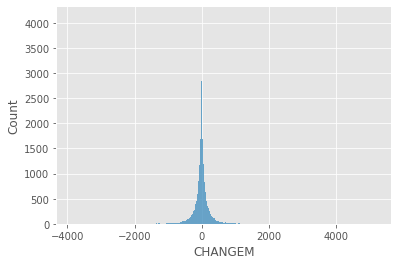

In [12]:
sns.histplot(data.CHANGEM)

In [13]:
data.CHANGER.describe() # 수익 변화율(%)

count    70545.000000
mean        -1.205881
std         38.770377
min      -1107.740000
25%         -7.110000
50%         -0.290000
75%          1.600000
max       2483.480000
Name: CHANGER, dtype: float64

<AxesSubplot:xlabel='CHANGEM', ylabel='Count'>

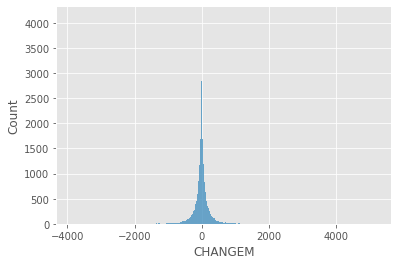

In [14]:
sns.histplot(data.CHANGEM)

### 2.2 데이터셋 분리 및 target확인

In [15]:
print(data['CHURNDEP'].value_counts(dropna=False))
print(data['CHURNDEP'].value_counts(dropna=False,normalize =1))

NaN    31047
0.0    20000
1.0    20000
Name: CHURNDEP, dtype: int64
NaN    0.436992
0.0    0.281504
1.0    0.281504
Name: CHURNDEP, dtype: float64


In [16]:
pd.concat([data[['CHURNDEP','CHURN']].value_counts(dropna = False, sort = False, normalize= True),
        data[['CHURNDEP','CHURN']].value_counts(dropna = False, sort = False)], axis  =1)
# CHURNDEP가 na인 건 : test data
# CHURNDEP가 0 or 1인건 : train data
 

0      1
CHURNDEP CHURN                 
0.0      0      0.281504  20000
1.0      1      0.281504  20000
NaN      0      0.428421  30438
         1      0.008572    609

In [17]:
pd.concat([data[data.CHURNDEP.isna()]['CHURN'].value_counts(dropna = False),
data[data.CHURNDEP.isna()]['CHURN'].value_counts(dropna = False, normalize = 1)], axis = 1)
# 이탈율 1.9%

,CHURN,CHURN
0,30438,0.980385
1,609,0.019615


## 3. null 값 확인 및 처리

In [18]:
data.isna().sum()
# print rows늘리기
pd.set_option('display.max_rows', 80)  


## REVENUE, MOU, RECCHRGE, DIRECTAS, OVERAGE, ROAM : 각 216개 
## CHANGEM, CHANGER : 각 502개 
## PHONE, MODELS, EQPDAYS : 각 1개 
## CSA : 28개
## AGE1 ,AGE2 : 1,244
## CHURNDEP : 31,047개 

In [19]:
data.isna().sum()

REVENUE       216
MOU           216
RECCHRGE      216
DIRECTAS      216
OVERAGE       216
ROAM          216
CHANGEM       502
CHANGER       502
DROPVCE         0
BLCKVCE         0
UNANSVCE        0
CUSTCARE        0
THREEWAY        0
MOUREC          0
OUTCALLS        0
INCALLS         0
PEAKVCE         0
OPEAKVCE        0
DROPBLK         0
CALLFWDV        0
CALLWAIT        0
CHURN           0
MONTHS          0
UNIQSUBS        0
ACTVSUBS        0
CSA            28
PHONES          1
MODELS          1
EQPDAYS         1
CUSTOMER        0
AGE1         1244
AGE2         1244
CHILDREN        0
CREDITA         0
CREDITAA        0
CREDITB         0
CREDITC         0
CREDITDE        0
CREDITGY        0
CREDITZ         0
PRIZMRUR        0
PRIZMUB         0
PRIZMTWN        0
REFURB          0
WEBCAP          0
TRUCK           0
RV              0
OCCPROF         0
OCCCLER         0
OCCCRFT         0
OCCSTUD         0
OCCHMKR         0
OCCRET          0
OCCSELF         0
OWNRENT         0
MARRYUN   

In [20]:
# REVENUE 가 NULL 값인것 확인해보기(월평균수익)
data[pd.isnull(data['REVENUE'])].iloc[:,:77].isnull().sum()

## REVENUE, MOU, RECCHRGE, DIRECTAS, OVERAGE, ROAM, CHANGEM, CHANGER  8개 컬럼은 하나의 값이 Null 값이면 모두 Null 값 
## Null 값이 의미가 있는 Null 인가? Null이 나올 수 있나? 
## Yes 일시정지 같은경우 Null 이 나올 수 있고, 이는 0 을 의미함 

REVENUE     216
MOU         216
RECCHRGE    216
DIRECTAS    216
OVERAGE     216
ROAM        216
CHANGEM     216
CHANGER     216
DROPVCE       0
BLCKVCE       0
UNANSVCE      0
CUSTCARE      0
THREEWAY      0
MOUREC        0
OUTCALLS      0
INCALLS       0
PEAKVCE       0
OPEAKVCE      0
DROPBLK       0
CALLFWDV      0
CALLWAIT      0
CHURN         0
MONTHS        0
UNIQSUBS      0
ACTVSUBS      0
CSA           0
PHONES        0
MODELS        0
EQPDAYS       0
CUSTOMER      0
AGE1          6
AGE2          6
CHILDREN      0
CREDITA       0
CREDITAA      0
CREDITB       0
CREDITC       0
CREDITDE      0
CREDITGY      0
CREDITZ       0
PRIZMRUR      0
PRIZMUB       0
PRIZMTWN      0
REFURB        0
WEBCAP        0
TRUCK         0
RV            0
OCCPROF       0
OCCCLER       0
OCCCRFT       0
OCCSTUD       0
OCCHMKR       0
OCCRET        0
OCCSELF       0
OWNRENT       0
MARRYUN       0
MARRYYES      0
MARRYNO       0
MAILORD       0
MAILRES       0
MAILFLAG      0
TRAVEL        0
PCOWN   

In [21]:
data[pd.isnull(data['AGE1'])]

,REVENUE,MOU,RECCHRGE,DIRECTAS,OVERAGE,ROAM,CHANGEM,CHANGER,DROPVCE,BLCKVCE,...,REFER,INCMISS,INCOME,MCYCLE,CREDITAD,SETPRCM,SETPRC,RETCALL,CALIBRAT,CHURNDEP
52,122.00,1806.50,75.00,15.59,146.25,1.00,-155.50,-32.84,5.00,14.00,...,0,1,0,0,0,0,29.99,0,0,NaN
72,33.52,26.25,30.00,0.00,0.00,0.00,4.75,-0.27,0.00,0.00,...,0,1,0,0,0,0,29.99,0,0,NaN
119,57.39,392.00,42.17,4.46,42.50,1.54,-17.00,-13.16,0.33,6.00,...,0,1,0,0,0,0,29.99,0,0,NaN
146,97.54,482.50,114.99,0.00,19.50,0.00,-186.50,-7.80,3.00,3.67,...,0,1,0,0,0,0,29.99,0,0,NaN
180,104.29,1005.00,104.99,0.99,2.50,3.69,-145.00,1.94,5.00,2.67,...,0,1,0,0,0,0,29.99,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70942,34.50,86.50,29.99,0.00,0.00,0.00,11.50,2.52,1.00,0.00,...,0,1,0,0,0,0,29.99,0,1,1.0
70975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.33,0.33,...,0,1,0,0,0,0,79.99,0,1,1.0
70981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.00,1.00,...,0,1,0,0,0,0,129.99,0,1,1.0
71007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.67,0.67,...,0,1,0,0,0,1,0.00,0,1,1.0


In [22]:
data[pd.isnull(data['AGE1'])].iloc[:,:77].isnull().sum()

## AGE1이 NULL인것을 살펴보니 6개 row는 Null 값이 계속 같이 있는 유저임 -> 이 유저는 분석에 삭제 !!! 

REVENUE        6
MOU            6
RECCHRGE       6
DIRECTAS       6
OVERAGE        6
ROAM           6
CHANGEM        9
CHANGER        9
DROPVCE        0
BLCKVCE        0
UNANSVCE       0
CUSTCARE       0
THREEWAY       0
MOUREC         0
OUTCALLS       0
INCALLS        0
PEAKVCE        0
OPEAKVCE       0
DROPBLK        0
CALLFWDV       0
CALLWAIT       0
CHURN          0
MONTHS         0
UNIQSUBS       0
ACTVSUBS       0
CSA            0
PHONES         0
MODELS         0
EQPDAYS        0
CUSTOMER       0
AGE1        1244
AGE2        1244
CHILDREN       0
CREDITA        0
CREDITAA       0
CREDITB        0
CREDITC        0
CREDITDE       0
CREDITGY       0
CREDITZ        0
PRIZMRUR       0
PRIZMUB        0
PRIZMTWN       0
REFURB         0
WEBCAP         0
TRUCK          0
RV             0
OCCPROF        0
OCCCLER        0
OCCCRFT        0
OCCSTUD        0
OCCHMKR        0
OCCRET         0
OCCSELF        0
OWNRENT        0
MARRYUN        0
MARRYYES       0
MARRYNO        0
MAILORD       

In [23]:
data[pd.isnull(data['PHONES'])].iloc[:,:77].isnull().sum()
## PHONES  Null 값인경우 기기 정보인 MODEL, DQPDAYS외에 다른 변수의 null 값과 겹치지 않음.-> NULL  값 삭제   

pd.set_option('display.max_rows', 30)  # pandas 시각화 옵션 원상태로 

In [24]:
data[pd.isnull(data['PHONES'])].iloc[:,:77].isnull().sum().sum()

3

In [25]:
del_idx = np.where((data['AGE1'].isna())|(data['PHONES'].isna())|(data['CSA'].isna()) )[0]

In [26]:
len(del_idx)

1273

In [27]:
data_na_treat = data.drop(del_idx).reset_index(drop = True)
data_na_treat.shape

(69774, 78)

In [28]:
fillna_cols = ['REVENUE','MOU','RECCHRGE','DIRECTAS','ROAM','CHANGEM','CHANGER','OVERAGE']

In [29]:
data_na_treat[fillna_cols] = data_na_treat[fillna_cols].fillna(0)

In [30]:
# 학습 테스트 변수를 제외한 나머지 변수에 Null 값이 있는지 확인
data_na_treat.iloc[:,0:77].isnull().sum().sum()

0

## 4. EDA
#### 4.1 연속형 데이터 탐색

In [31]:
n_bins = 10 
data_na_treat['bin'] = pd.cut(data_na_treat['REVENUE'],bins = n_bins)

temp_1 = pd.DataFrame(data_na_treat.groupby(['CHURN','bin']).CUSTOMER.count()).reset_index()
temp_1_pivot = temp_1.pivot(index = 'bin',columns = 'CHURN',values = 'CUSTOMER')
temp_1_pivot['row_sum'] = temp_1_pivot.sum(axis=1)
temp_1_pivot[0] = temp_1_pivot[0]/temp_1_pivot['row_sum']
temp_1_pivot[1] = temp_1_pivot[1]/temp_1_pivot['row_sum']

temp_1_pivot

CHURN,0,1,row_sum
bin,,,
"(-7.4, 116.785]",0.709264,0.290736,64636
"(116.785, 239.74]",0.716467,0.283533,4585
"(239.74, 362.695]",0.677725,0.322275,422
"(362.695, 485.65]",0.807229,0.192771,83
"(485.65, 608.605]",0.852941,0.147059,34
"(608.605, 731.56]",0.833333,0.166667,6
"(731.56, 854.515]",0.500000,0.500000,4
"(854.515, 977.47]",0.333333,0.666667,3
"(977.47, 1100.425]",NaN,NaN,0


In [32]:
## 연속형 변수 그래프 생성 함수 
def hist_plot (colname, taget_colname, n_bin = 10) : # colname : 그래프 그릴 컬럼명 , taget_colname: n_bin : 구간갯수 

  n_bins = int(n_bin) 
  data_na_treat['bin'] = pd.cut(data_na_treat[colname],bins = n_bins)

  temp = data_na_treat.reset_index().groupby([taget_colname,'bin']).index.count().reset_index() # 구간화
  temp = temp.pivot(index = 'bin',columns = taget_colname, values = 'index')
  temp['row_sum'] = temp.sum(axis = 1) # 각각의 비율을 만들기 위해 구간 합계 생성
  temp['0_rate'] = temp[0]/temp['row_sum'] #각 row의 0의 비율 
  temp['1_rate'] = temp[1]/temp['row_sum'] #각 row의 1의 비율 

  ## 그래프
  fig = plt.figure()
  aig, ax = plt.subplots(ncols = 2 , figsize =(12,5))
  
  ## 첫번째  히스토그램 
  sns.histplot(data = data_na_treat, x= colname, hue= taget_colname, bins = n_bins, color=['orange','blue'], alpha  = 0.5, hue_order= (0,1), ax= ax[0])

  ## 구간별 타겟비율 그래프
  temp[['0_rate','1_rate']].plot.bar(stacked = True ,ax= ax[1])
  ax[1].legend(labels=[0,1],title =taget_colname) # 범례 순서 바꾸기 
  plt.xlabel(colname)
  plt.show()

In [33]:
# 명속형 변수 그래프 생성 함수 
def bar_plot (colname, taget_colname): # colname : 그래프 그릴 컬럼명 , taget_colname: target 컬럼명

## 그래프용 데이터 생성 
  temp = data_na_treat.reset_index().groupby([colname,taget_colname]).index.count()
  temp = temp.reset_index()
  temp = temp.pivot(index = colname, columns = taget_colname, values ='index')
  temp['row_sum'] = temp.sum(axis=1)
  temp['0_rate'] = temp[0]/temp['row_sum']
  temp['1_rate'] = temp[1]/temp['row_sum']
 
## 그래프
  fig = plt.figure()
  aig, ax = plt.subplots(ncols = 2 , figsize =(12,5))
## 빈도 막대 그래프 
  temp[[0,1]].plot.bar(stacked = True ,ax= ax[0])
  ax[0].legend(labels=[0,1],title =taget_colname) # 범례 순서 바꾸기 
  plt.xlabel(colname)
## 구간별 타겟 비율 막대 그래프 
  temp[['0_rate','1_rate']].plot.bar(stacked = True ,ax= ax[1])
  ax[1].legend(labels=[0,1],title =taget_colname) # 범례 순서 바꾸기 
  plt.xlabel(colname)
  plt.show()
  
  print(data_na_treat[colname].value_counts(normalize=True).sort_index())
  print(" ")
  print(pd.crosstab(index = data_na_treat[taget_colname], columns = data_na_treat[colname],margins = True, margins_name ="total",normalize = 'columns'))

<Figure size 432x288 with 0 Axes>

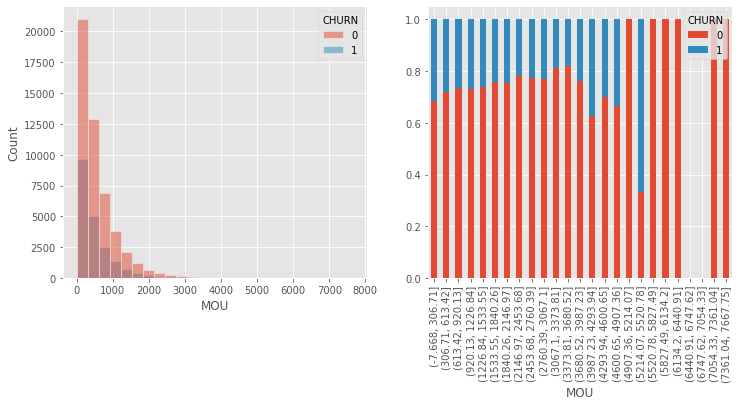

In [34]:
hist_plot('MOU','CHURN',25)

In [35]:
cat_colname =  [x for x in data_na_treat.columns if data_na_treat[x].dtypes == 'O']
int_colname = [x for x in data_na_treat.columns if data_na_treat[x].dtypes != 'O']

In [36]:
cat_colname

['CSA']

<Figure size 432x288 with 0 Axes>

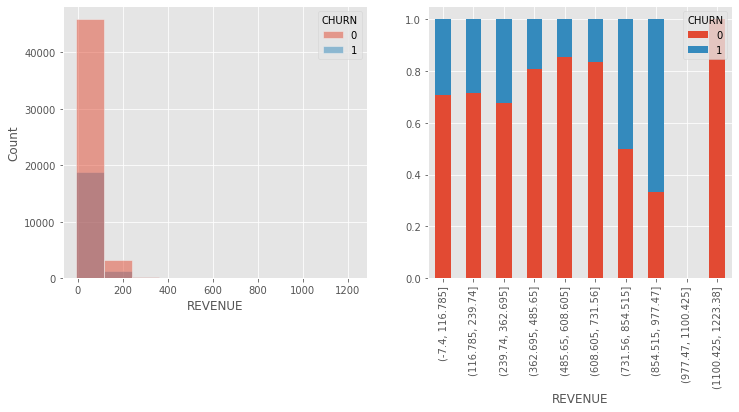

<Figure size 432x288 with 0 Axes>

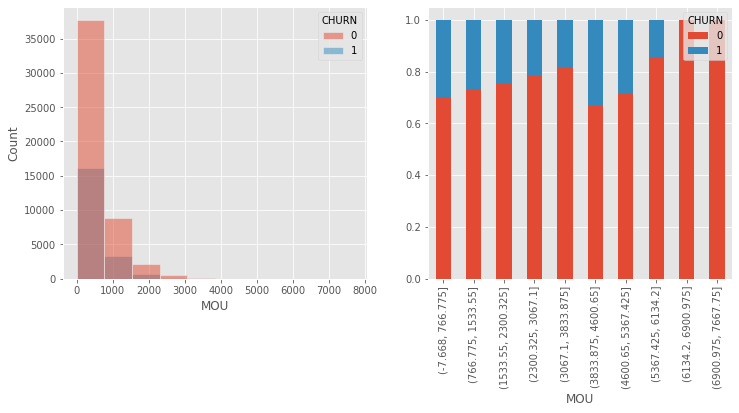

<Figure size 432x288 with 0 Axes>

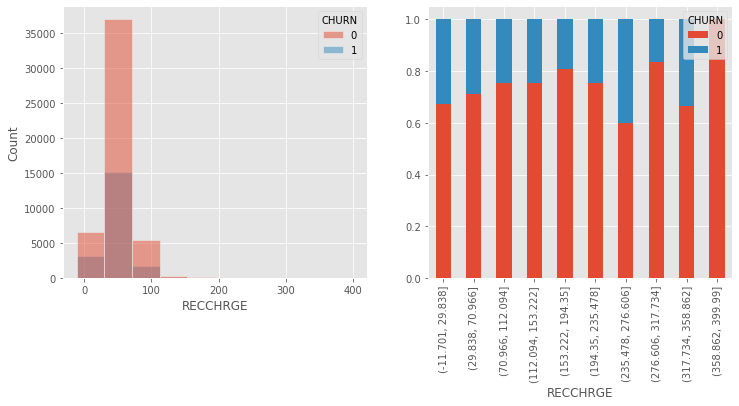

<Figure size 432x288 with 0 Axes>

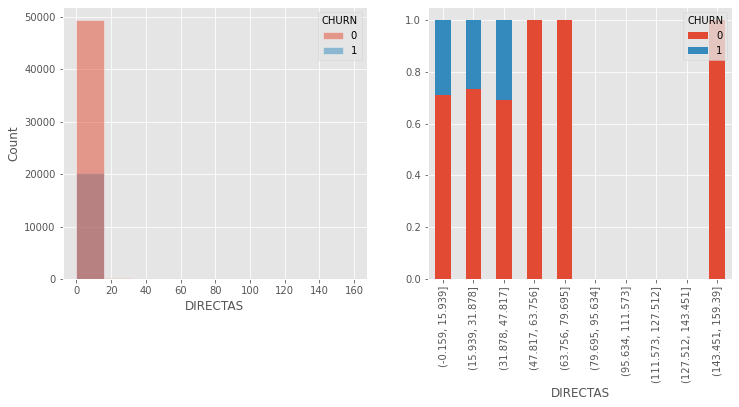

<Figure size 432x288 with 0 Axes>

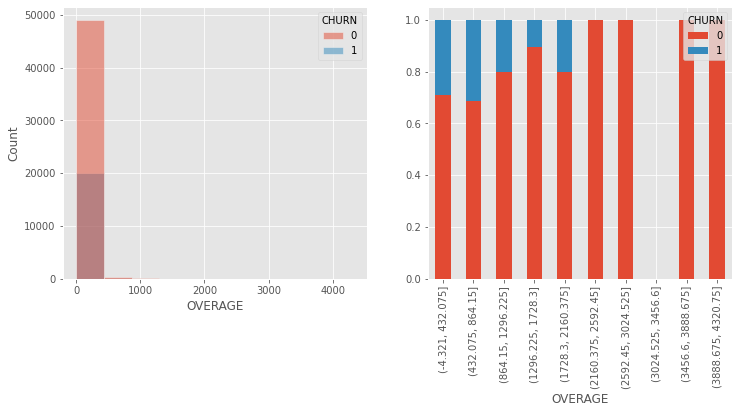

<Figure size 432x288 with 0 Axes>

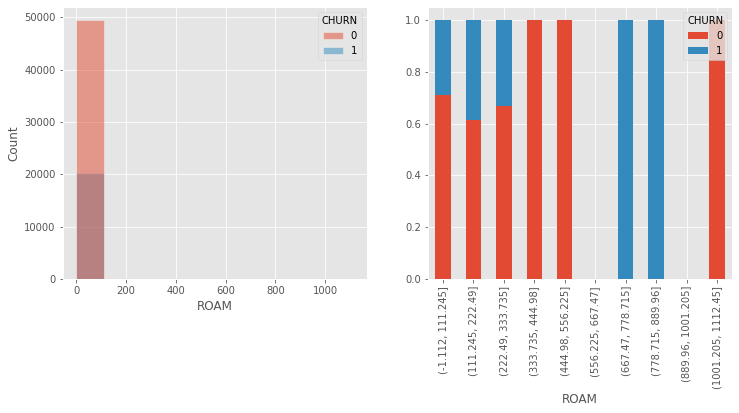

<Figure size 432x288 with 0 Axes>

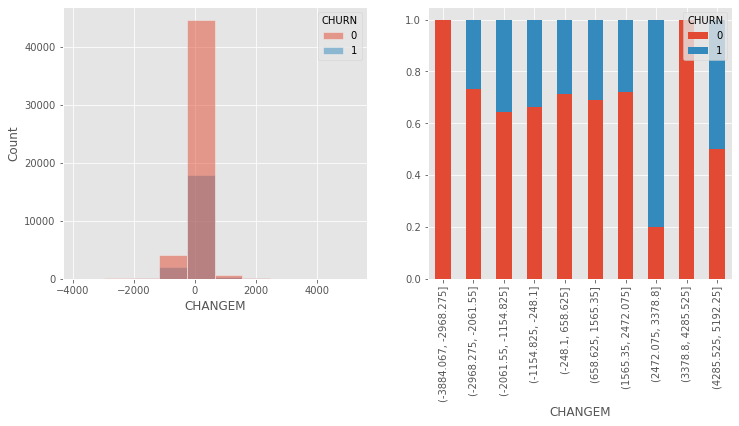

<Figure size 432x288 with 0 Axes>

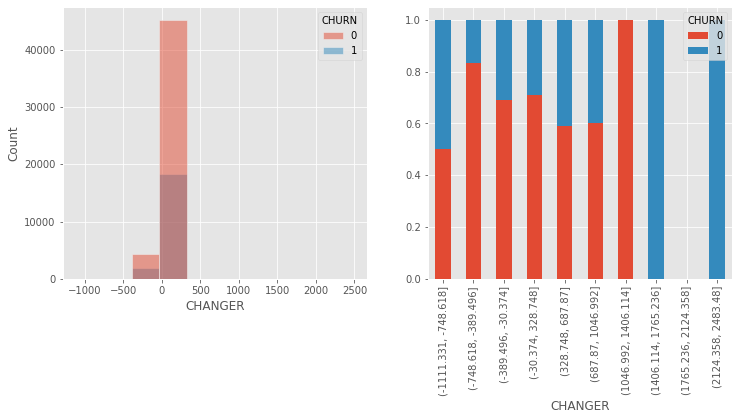

<Figure size 432x288 with 0 Axes>

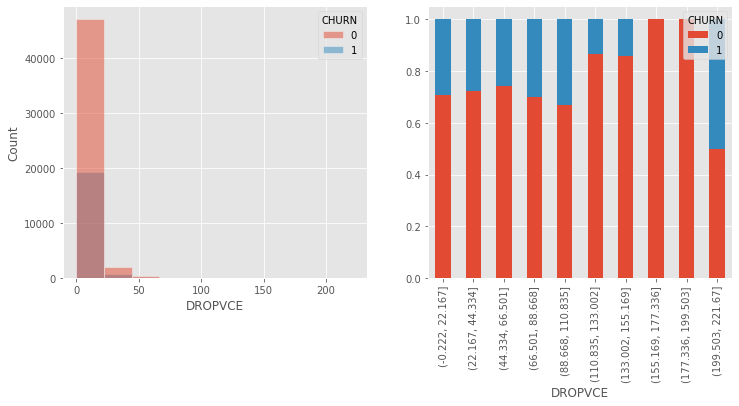

<Figure size 432x288 with 0 Axes>

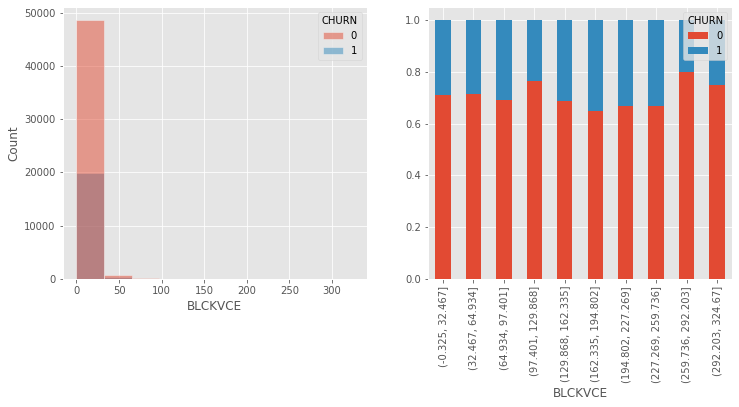

In [37]:
## 연속형 변수 그래프 생성
for i in int_colname[0:10] :
  hist_plot(i,'CHURN',10)

In [38]:
 # onehot처리되어있는 변수 > 명목형 변수로 변환해주기
 data_na_treat[['CREDITA','CREDITAA','CREDITB','CREDITC','CREDITDE','CREDITGY','CREDITZ']]

,CREDITA,CREDITAA,CREDITB,CREDITC,CREDITDE,CREDITGY,CREDITZ
0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
69769,0,0,0,0,1,0,0
69770,1,0,0,0,0,0,0
69771,1,0,0,0,0,0,0
69772,1,0,0,0,0,0,0


In [39]:
CREDIT =  data_na_treat[['CREDITA','CREDITAA','CREDITB','CREDITC','CREDITDE','CREDITGY','CREDITZ']].stack() #하나의 Series로 쌓기 

In [41]:
CREDIT

0      CREDITA     0
       CREDITAA    0
       CREDITB     0
       CREDITC     0
       CREDITDE    1
                  ..
69773  CREDITB     0
       CREDITC     0
       CREDITDE    1
       CREDITGY    0
       CREDITZ     0
Length: 488418, dtype: int64

In [46]:
CREDIT = CREDIT[CREDIT != 0].index.get_level_values(1)

In [50]:
CREDIT = pd.Series(CREDIT)

In [75]:
pd.set_option('display.max_rows', 30)  # pandas 시각화 옵션 원상태로 

In [81]:
data_na_treat['CREDIT'] = CREDIT.str.replace('CREDIT','')  # 값의 앞에 'CREDIT을 삭제하여 신용등급만 값으로 만들기
data_na_treat['CREDIT'].head(10)  # 데이터 확인 
# [x[6:] for x in CREDIT]

0    DE
1     C
2     A
3     A
4     A
5     C
6     B
7     A
8     A
9     B
Name: CREDIT, dtype: object

In [82]:
data_na_treat.head()

,REVENUE,MOU,RECCHRGE,DIRECTAS,OVERAGE,ROAM,CHANGEM,CHANGER,DROPVCE,BLCKVCE,...,INCOME,MCYCLE,CREDITAD,SETPRCM,SETPRC,RETCALL,CALIBRAT,CHURNDEP,bin,CREDIT
0,57.49,482.75,37.43,0.25,22.75,0.0,532.25,50.99,8.33,1.00,...,5,0,1,0,149.99,0,0,NaN,"(-0.325, 32.467]",DE
1,82.28,1312.25,75.00,1.24,0.00,0.0,156.75,8.14,52.00,7.67,...,6,0,0,0,9.99,0,0,NaN,"(-0.325, 32.467]",C
2,31.66,25.50,29.99,0.25,0.00,0.0,59.50,4.03,0.00,1.00,...,9,0,1,0,29.99,0,0,NaN,"(-0.325, 32.467]",A
3,62.13,97.50,65.98,2.48,0.00,0.0,23.50,6.82,0.00,0.33,...,6,0,0,0,29.99,0,0,NaN,"(-0.325, 32.467]",A
4,25.22,2.50,25.00,0.00,0.00,0.0,-2.50,-0.23,0.00,0.00,...,7,0,0,0,29.99,0,0,NaN,"(-0.325, 32.467]",A


In [86]:
pd.concat([data_na_treat.CREDIT.value_counts()
,data_na_treat.CREDIT.value_counts(1)],axis = 1)

,CREDIT,CREDIT
AA,26012,0.372804
A,11846,0.169777
B,11516,0.165047
DE,8973,0.128601
C,7301,0.104638
Z,2877,0.041233
GY,1249,0.017901


<Figure size 432x288 with 0 Axes>

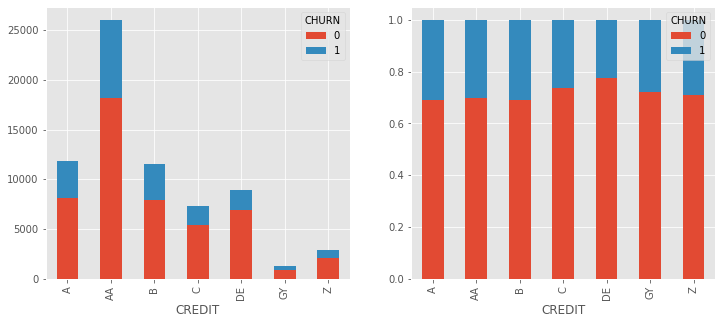

A     0.169777
AA    0.372804
B     0.165047
C     0.104638
DE    0.128601
GY    0.017901
Z     0.041233
Name: CREDIT, dtype: float64
 
CREDIT         A        AA         B        C        DE        GY        Z  \
CHURN                                                                        
0       0.689009  0.697255  0.689823  0.73579  0.775326  0.722978  0.71081   
1       0.310991  0.302745  0.310177  0.26421  0.224674  0.277022  0.28919   

CREDIT    total  
CHURN            
0       0.70972  
1       0.29028  


In [87]:
bar_plot('CREDIT', 'CHURN')
# credict A그룹의 이탈이 조금 높음

In [94]:
pd.crosstab(data_na_treat['CSA'].str.slice(0,3),data_na_treat['CHURN'], margins = True)

CHURN,0,1,All
CSA,,,
AIR,637,263,900
APC,2467,887,3354
ATH,24,12,36
ATL,1801,703,2504
AWI,80,18,98
...,...,...,...
SLC,155,105,260
SLU,1,0,1
STL,969,279,1248


In [97]:
pd.crosstab(data_na_treat['CSA'].str.slice(0,3),data_na_treat['CHURN'], margins = True, normalize = True)
## 주단위로 보더라도 더 비율이 너무 작아 사용하기 어려움 

CHURN,0,1,All
CSA,,,
AIR,0.009129,0.003769,0.012899
APC,0.035357,0.012712,0.048069
ATH,0.000344,0.000172,0.000516
ATL,0.025812,0.010075,0.035887
AWI,0.001147,0.000258,0.001405
...,...,...,...
SLC,0.002221,0.001505,0.003726
SLU,0.000014,0.000000,0.000014
STL,0.013888,0.003999,0.017886


In [89]:
data_na_treat['CSA'].str.slice(0,3)

0        MIL
1        PIT
2        OKC
3        OKC
4        SAN
        ... 
69769    LAX
69770    LAX
69771    LAX
69772    LAX
69773    LAX
Name: CSA, Length: 69774, dtype: object

### 5.변수파생(feature engineering)

In [104]:
def over0(x):
  if x>0 :
    return 1
  else : 
    return 0

In [109]:
# data_na_treat['AGE1'].apply(lambda x: 1 if x>0 0 else 0)

In [110]:
# 가족수 
data_na_treat['FAMILY_CNT']= data_na_treat['AGE1'].apply(over0) + data_na_treat['AGE2'].apply(over0) + data_na_treat['CHILDREN']

# 전체 통화건수 
data_na_treat['TOTAL_CALLS'] = data_na_treat['INCALLS'] +data_na_treat['OUTCALLS']  

# 추가비용
data_na_treat['OVER_CHARGE'] = data_na_treat['REVENUE'] - data_na_treat['RECCHRGE']  

# 추가서비스 사용갯수
data_na_treat['ADDED_SERVICE_CNT']= data_na_treat['THREEWAY'].apply(over0) + data_na_treat['CALLFWDV'].apply(over0) + data_na_treat['CALLWAIT'].apply(over0)

data_na_treat[['FAMILY_CNT','TOTAL_CALLS','OVER_CHARGE','ADDED_SERVICE_CNT']].head()

,FAMILY_CNT,TOTAL_CALLS,OVER_CHARGE,ADDED_SERVICE_CNT
0,1,52.66,20.06,2
1,1,517.33,7.28,2
2,2,0.00,1.67,0
3,3,3.67,-3.85,0
4,0,0.33,0.22,0


<Figure size 432x288 with 0 Axes>

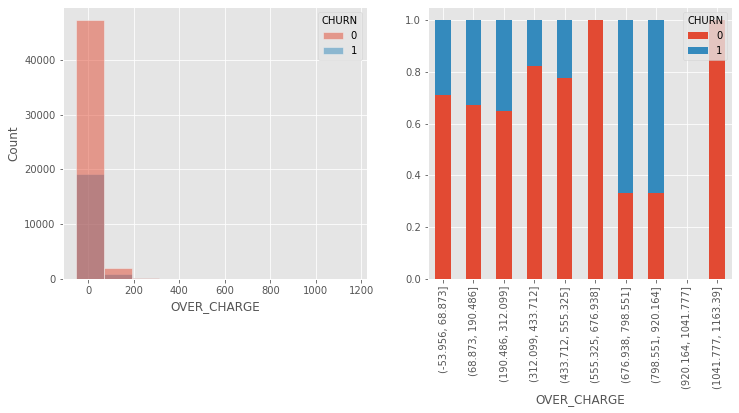

In [111]:
hist_plot('OVER_CHARGE','CHURN')

## *6*. 데이터 세트 분할 및 미사용 변수 제거 



In [ ]:
X_train = data_na_treat[data_na_treat['CHURNDEP'].isnull() == False].drop(['CUSTOMER','CHURN','CALIBRAT','CHURNDEP','CSA','bin','CREDIT','NEWCELLN'],axis= 1)
X_test = data_na_treat[data_na_treat['CHURNDEP'].isnull() ].drop(['CUSTOMER','CHURN','CALIBRAT','CHURNDEP','CSA','bin','CREDIT','NEWCELLN'],axis= 1)
y_train = data_na_treat[data_na_treat['CHURNDEP'].isnull() == False].CHURN
y_test = data_na_treat[data_na_treat['CHURNDEP'].isnull() ].CHURN

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (39277, 72)
X_test shape:  (30497, 72)
y_train shape:  (39277,)
y_test shape:  (30497,)


In [ ]:
X_train.head()

,REVENUE,MOU,RECCHRGE,DIRECTAS,OVERAGE,ROAM,CHANGEM,CHANGER,DROPVCE,BLCKVCE,UNANSVCE,CUSTCARE,THREEWAY,MOUREC,OUTCALLS,INCALLS,PEAKVCE,OPEAKVCE,DROPBLK,CALLFWDV,CALLWAIT,MONTHS,UNIQSUBS,ACTVSUBS,PHONES,MODELS,EQPDAYS,AGE1,AGE2,CHILDREN,CREDITA,CREDITAA,CREDITB,CREDITC,CREDITDE,CREDITGY,CREDITZ,PRIZMRUR,PRIZMUB,PRIZMTWN,REFURB,WEBCAP,TRUCK,RV,OCCPROF,OCCCLER,OCCCRFT,OCCSTUD,OCCHMKR,OCCRET,OCCSELF,OWNRENT,MARRYUN,MARRYYES,MARRYNO,MAILORD,MAILRES,MAILFLAG,TRAVEL,PCOWN,CREDITCD,RETCALLS,RETACCPT,NEWCELLY,REFER,INCMISS,INCOME,MCYCLE,CREDITAD,SETPRCM,SETPRC,RETCALL
31047,38.00,7.50,38.00,0.00,0.0,0.0,-1.50,0.00,0.00,0.00,0.0,0.00,0.00,0.41,0.33,0.00,1.33,3.67,0.00,0.0,0.00,60,1,1,1.0,1.0,1812.0,26.0,26.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,6,0,0,1,0.00,0
31048,55.23,570.50,71.98,0.00,0.0,0.0,38.50,0.00,9.67,0.67,77.0,8.67,0.00,106.33,14.67,0.67,97.33,90.33,10.33,0.0,0.00,57,1,1,6.0,4.0,434.0,56.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,6,0,2,0,79.99,0
31049,38.05,682.50,52.49,0.25,0.0,0.0,147.50,-3.06,9.00,1.67,13.0,0.67,0.00,42.20,6.67,0.00,33.33,53.00,10.67,0.0,0.67,53,1,1,3.0,2.0,231.0,28.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,29.99,0
31050,97.34,1039.00,50.00,4.95,419.5,0.0,198.00,23.26,12.67,3.00,176.0,11.33,0.33,213.85,103.33,0.33,238.33,192.33,15.67,0.0,4.00,55,1,1,3.0,3.0,700.0,38.0,24.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,4,0,3,0,9.99,0
31051,35.30,24.25,34.98,0.00,0.0,0.0,19.75,-0.31,0.00,0.00,1.0,0.00,0.00,2.39,4.00,1.67,9.33,1.67,0.00,0.0,0.00,53,3,3,4.0,3.0,544.0,36.0,34.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,9,0,0,0,79.99,0


In [ ]:
print(y_train.head(10))
print(y_train.value_counts())

31047    0
31048    0
31049    0
31050    0
31051    0
31052    0
31053    0
31054    0
31055    0
31056    0
Name: CHURN, dtype: int64
1    19662
0    19615
Name: CHURN, dtype: int64


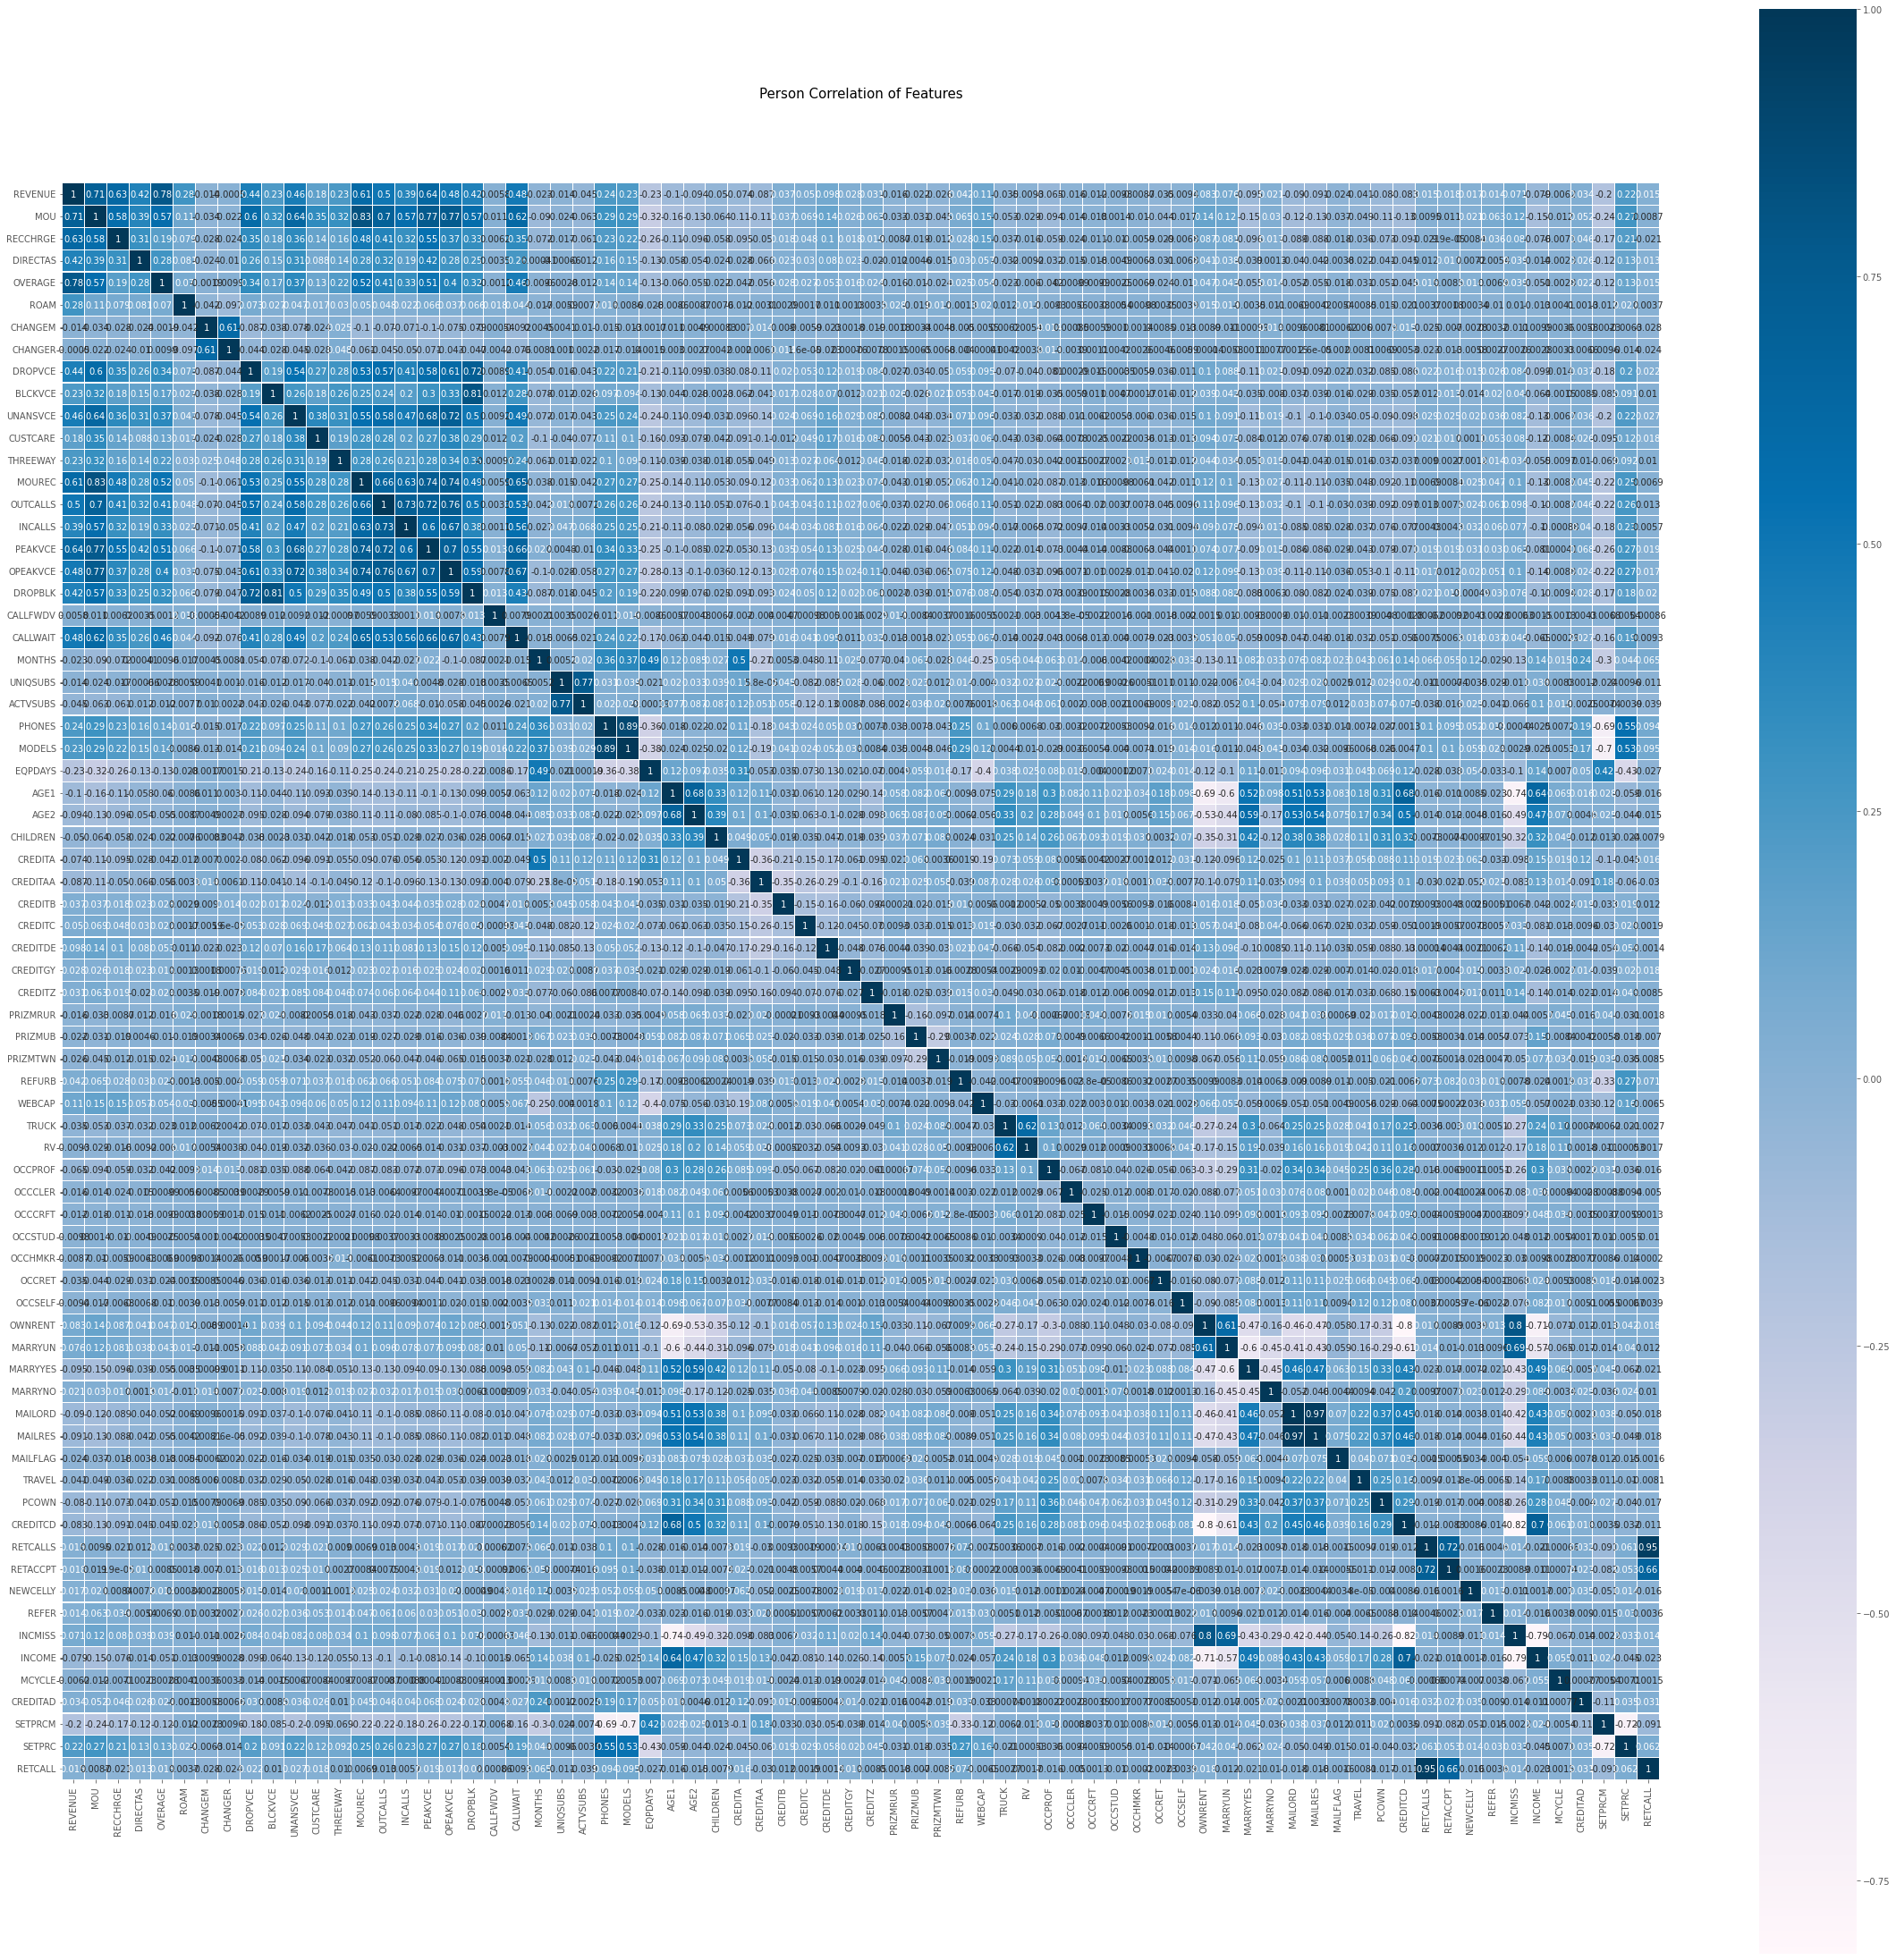

In [ ]:
# 변수간의 상관분석 
# RF는 상관관계가 높아도 다중공선성문제가 없지만, 회귀에서는 문제가 발생한다
# (w.rf의 경우 트리 배깅방식으로 앙상블 > 한 노드에서 분지가능한 규칙 가운데, 불순도를 최대로 낮추는
#  > 다중공산성이 크다면 불순도 감소폭이 적을것!!! 따라서 RF에선 다중공선성 문제x)
# 더미변수가 아닌 합쳐져있는 명목형 변수로 넣어서 봐야한다!!(중요)
colormap = plt.cm.PuBu
plt.figure(figsize=(40,40))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(X_train.astype(float).corr(), linewidths = 0.1, vmax = 1.0,square = True, cmap = colormap, linecolor = "white", annot = True)

## *7*. 모델링 및 평가

### 7.1 RandomForest

In [ ]:
X_train

,REVENUE,MOU,RECCHRGE,DIRECTAS,OVERAGE,ROAM,CHANGEM,CHANGER,DROPVCE,BLCKVCE,UNANSVCE,CUSTCARE,THREEWAY,MOUREC,OUTCALLS,INCALLS,PEAKVCE,OPEAKVCE,DROPBLK,CALLFWDV,CALLWAIT,MONTHS,UNIQSUBS,ACTVSUBS,PHONES,MODELS,EQPDAYS,AGE1,AGE2,CHILDREN,CREDITA,CREDITAA,CREDITB,CREDITC,CREDITDE,CREDITGY,CREDITZ,PRIZMRUR,PRIZMUB,PRIZMTWN,REFURB,WEBCAP,TRUCK,RV,OCCPROF,OCCCLER,OCCCRFT,OCCSTUD,OCCHMKR,OCCRET,OCCSELF,OWNRENT,MARRYUN,MARRYYES,MARRYNO,MAILORD,MAILRES,MAILFLAG,TRAVEL,PCOWN,CREDITCD,RETCALLS,RETACCPT,NEWCELLY,REFER,INCMISS,INCOME,MCYCLE,CREDITAD,SETPRCM,SETPRC,RETCALL
31047,38.00,7.50,38.00,0.00,0.0,0.0,-1.50,0.00,0.00,0.00,0.00,0.00,0.00,0.41,0.33,0.00,1.33,3.67,0.00,0.0,0.00,60,1,1,1.0,1.0,1812.0,26.0,26.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,6,0,0,1,0.00,0
31048,55.23,570.50,71.98,0.00,0.0,0.0,38.50,0.00,9.67,0.67,77.00,8.67,0.00,106.33,14.67,0.67,97.33,90.33,10.33,0.0,0.00,57,1,1,6.0,4.0,434.0,56.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,6,0,2,0,79.99,0
31049,38.05,682.50,52.49,0.25,0.0,0.0,147.50,-3.06,9.00,1.67,13.00,0.67,0.00,42.20,6.67,0.00,33.33,53.00,10.67,0.0,0.67,53,1,1,3.0,2.0,231.0,28.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,29.99,0
31050,97.34,1039.00,50.00,4.95,419.5,0.0,198.00,23.26,12.67,3.00,176.00,11.33,0.33,213.85,103.33,0.33,238.33,192.33,15.67,0.0,4.00,55,1,1,3.0,3.0,700.0,38.0,24.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,4,0,3,0,9.99,0
31051,35.30,24.25,34.98,0.00,0.0,0.0,19.75,-0.31,0.00,0.00,1.00,0.00,0.00,2.39,4.00,1.67,9.33,1.67,0.00,0.0,0.00,53,3,3,4.0,3.0,544.0,36.0,34.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,9,0,0,0,79.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71042,117.49,384.00,29.99,0.00,250.0,0.0,0.00,0.00,4.00,1.00,27.00,0.00,0.00,21.70,1.33,0.00,99.33,54.33,5.00,0.0,0.00,30,1,1,2.0,2.0,489.0,22.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,29.99,0
71043,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,2.00,1.67,0.00,0.0,0.00,25,1,1,1.0,1.0,773.0,34.0,26.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,6,0,0,1,0.00,0
71044,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,9.33,2.67,48.33,0.00,0.00,58.92,17.00,1.33,160.33,33.33,12.00,0.0,0.33,29,1,1,2.0,2.0,526.0,68.0,64.0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,6,0,0,0,59.99,0
71045,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.32,0.67,0.33,5.33,3.33,0.00,0.0,0.00,25,1,1,1.0,1.0,773.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,8,0,1,1,0.00,0


In [ ]:
# Random Forest 모델적용 

model_RF = RandomForestClassifier(n_estimators = 1000, random_state=0) # 기본 반복횟수 및 랜덤 시드 등 옵션 선택하여 분류기 생성 
model_RF.fit(X_train, y_train) # 학습용 데이터 지정하여 학습

RF_y_pred = model_RF.predict(X_test) # 학습된 모형에 확인용 데이터 (test_datase)를 넣어 예측값 생성 

RF_result = pd.DataFrame({'pred' : RF_y_pred, 'real' : y_test}) #정확도 평가를 위해 예측값과 실제값을 하나의 dataframe 에 생성  

RF_result.head(10) #확인 

,pred,real
0,0,0
1,0,0
2,1,0
3,0,0
4,1,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


Model accuracy : 0.5958
[[17789 12116]
 [  210   382]]
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     29905
           1       0.03      0.65      0.06       592

    accuracy                           0.60     30497
   macro avg       0.51      0.62      0.40     30497
weighted avg       0.97      0.60      0.73     30497

test_AUC :  0.6594637523328378


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


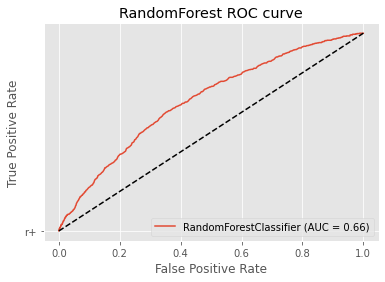

In [ ]:
# 정확도 확인
# confusion matrix 확인 
print('Model accuracy : {0:0.4f}'. format(accuracy_score(y_test, RF_y_pred)))
print(confusion_matrix(y_test, RF_y_pred))
print(classification_report(y_test, RF_y_pred))
print("test_AUC : ", metrics.roc_auc_score(y_test, model_RF.predict_proba(X_test)[:,1]))

# ROC 그래프
metrics.plot_roc_curve(model_RF, X_test, y_test) 
plt.plot([0,1], [0,1], "k--", "r+")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest ROC curve')
plt.show()


In [ ]:
feature_scores = pd.Series(model_RF.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores.head(10)

EQPDAYS     0.060859
CHANGEM     0.050182
MOU         0.047701
MONTHS      0.045590
CHANGER     0.043542
REVENUE     0.043317
PEAKVCE     0.038082
OPEAKVCE    0.037447
MOUREC      0.036971
UNANSVCE    0.035929
dtype: float64

### 7.2 Logstic Regession

In [ ]:
# from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀하려면, 가정된 분포를 해줘야하니까!! scaler 해줘야함!!!
# 파라미터 조정할거 없음
# 변수 하나하나마다 확률값을 보여준다
# from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression()
model_LR.fit(X_train_scaled, y_train)

LR_y_pred = model_LR.predict(X_test)

LR_result = pd.DataFrame({'pred' : LR_y_pred, 'real' : y_test})

LR_result.head(5)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,pred,real
0,0,0
1,0,0
2,1,0
3,1,0
4,1,0


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Model accuracy : 0.3286
[[ 9548 20357]
 [  119   473]]
              precision    recall  f1-score   support

           0       0.99      0.32      0.48     29905
           1       0.02      0.80      0.04       592

    accuracy                           0.33     30497
   macro avg       0.51      0.56      0.26     30497
weighted avg       0.97      0.33      0.47     30497

test_AUC :  0.572315683222095


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


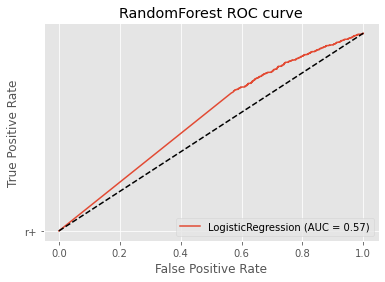

In [ ]:
print('Model accuracy : {0:0.4f}'. format(accuracy_score(y_test, LR_y_pred)))
print(confusion_matrix(y_test, LR_y_pred))
print(classification_report(y_test, LR_y_pred))
print("test_AUC : ", metrics.roc_auc_score(y_test, model_LR.predict_proba(X_test)[:,1]))

# ROC 그래프
metrics.plot_roc_curve(model_LR, X_test, y_test) 
plt.plot([0,1], [0,1], "k--", "r+")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest ROC curve')
plt.show()

In [ ]:
# 입력 변수의 Coefficent (변수별 영향력)
model_LR.coef_

array([[ 0.09331899, -0.14368483, -0.0879116 , -0.00405199,  0.06611027,
         0.05861283, -0.12655265,  0.09104106,  0.09918952,  0.06400998,
         0.03383373, -0.03105852, -0.03137627,  0.02517006,  0.03951617,
        -0.05398078, -0.06753589, -0.02143472, -0.04379508, -0.00120524,
         0.01347587, -0.19564259,  0.24955949, -0.13660685,  0.06665285,
         0.01443415,  0.37397373, -0.0769627 , -0.02656763,  0.04150075,
         0.00654467,  0.04078312,  0.03833483, -0.0287767 , -0.08757138,
         0.00147112,  0.000817  ,  0.01301816, -0.01935162,  0.01472697,
         0.07987916, -0.04648252,  0.01172335,  0.00216141, -0.00906239,
         0.00609863, -0.00407011,  0.01111869,  0.01480235, -0.00556579,
        -0.00856503, -0.00069824,  0.02203034, -0.00064342, -0.02392025,
         0.00191682, -0.06279141, -0.00517639,  0.00040008,  0.01192687,
         0.0172138 ,  0.02529216, -0.03321214, -0.02748724, -0.01218561,
        -0.03580401, -0.0400923 ,  0.01449245, -0.0

In [ ]:
range(0,X_train.shape[0])

range(0, 39277)

### 7.3 XGBoost

In [ ]:
#import xgboost as xgb
XGB_model = xgb.XGBClassifier(booster='gbtree',
                              colsample_bylevel=0.9,
                              colsample_bytree=0.8,
                              gamma=0,
                              max_depth=8,
                              min_child_weight=3,
                              n_estimators=50,
                              nthread=8,
                              objective='binary:logistic',
                              random_state=2, 
                              silent= True)



XGB_model.fit(X_train,y_train, eval_set=[(X_test,y_test)],early_stopping_rounds=50, eval_metric ='auc')

XGB_y_pred  = XGB_model.predict(X_test)

XGB_result = pd.DataFrame({'pred' : XGB_y_pred, 'real' : y_test})

XGB_result.head(5)



[0]	validation_0-auc:0.600338
Will train until validation_0-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.623102
[2]	validation_0-auc:0.634731
[3]	validation_0-auc:0.64487
[4]	validation_0-auc:0.649948
[5]	validation_0-auc:0.648627
[6]	validation_0-auc:0.651106
[7]	validation_0-auc:0.651269
[8]	validation_0-auc:0.652472
[9]	validation_0-auc:0.654744
[10]	validation_0-auc:0.655779
[11]	validation_0-auc:0.655964
[12]	validation_0-auc:0.656307
[13]	validation_0-auc:0.656462
[14]	validation_0-auc:0.65646
[15]	validation_0-auc:0.657604
[16]	validation_0-auc:0.659062
[17]	validation_0-auc:0.659729
[18]	validation_0-auc:0.660239
[19]	validation_0-auc:0.65907
[20]	validation_0-auc:0.658561
[21]	validation_0-auc:0.659098
[22]	validation_0-auc:0.658556
[23]	validation_0-auc:0.659607
[24]	validation_0-auc:0.659194
[25]	validation_0-auc:0.659624
[26]	validation_0-auc:0.658994
[27]	validation_0-auc:0.659072
[28]	validation_0-auc:0.65913
[29]	validation_0-auc:0.66017
[30]	validation_0-auc

,pred,real
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0


Model accuracy : 0.5990
[[17886 12019]
 [  211   381]]
              precision    recall  f1-score   support

           0       0.99      0.60      0.75     29905
           1       0.03      0.64      0.06       592

    accuracy                           0.60     30497
   macro avg       0.51      0.62      0.40     30497
weighted avg       0.97      0.60      0.73     30497

test_AUC :  0.6668273858208651


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


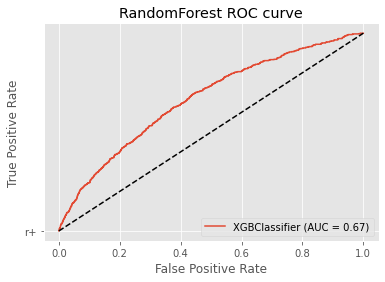

In [ ]:
print('Model accuracy : {0:0.4f}'. format(accuracy_score(y_test, XGB_y_pred)))
print(confusion_matrix(y_test, XGB_y_pred))
print(classification_report(y_test, XGB_y_pred))
print("test_AUC : ", metrics.roc_auc_score(y_test, XGB_model.predict_proba(X_test)[:,1]))

# ROC 그래프
metrics.plot_roc_curve(XGB_model, X_test, y_test) 
plt.plot([0,1], [0,1], "k--", "r+")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest ROC curve')
plt.show()

Text(0.5, 0, 'Xgboost Feature Importance')

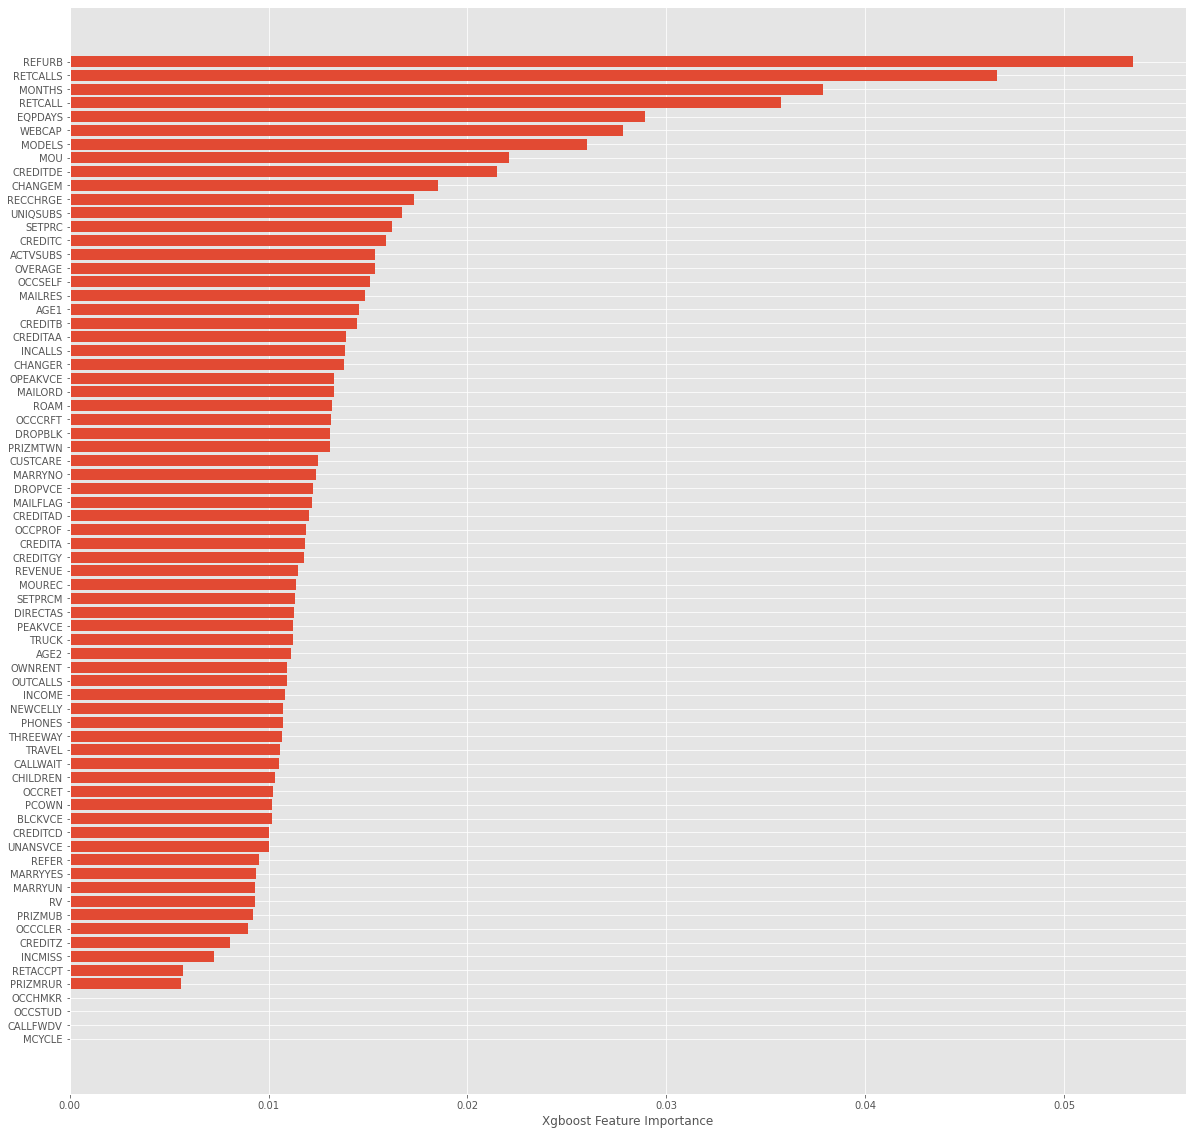

In [ ]:
plt.figure(figsize=(20,20))
sorted_idx = XGB_model.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], XGB_model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")